<a href="https://colab.research.google.com/github/mgw54/Colab_Clones/blob/main/20240905_20240830_15N_AEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import os
import time
import zipfile # import zipfile to handle zip archives
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
!unzip '20240820_MonoQ_AdductFormationConditions.zip'
# Extract the Excel file from the zip archive
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract to the current directory
# Find the extracted Excel file
import glob
excel_files = glob.glob('*.xls')
# Create a DataFrame for each Excel file
dataframes = {}
for excel_file in excel_files:
    df = pd.read_excel(excel_file)
    dataframes[excel_file] = df  # Store DataFrame with filename as key
# Now you have a dictionary 'dataframes' where keys are the filenames
# and values are the corresponding pandas DataFrames.
# You can access them like this:
for filename, df in dataframes.items():
    print(f"DataFrame for {filename}:")
    print(df)
    print("-" * 30)

filenames = os.listdir()
print(filenames)
rows1 = len(df.index)

Saving 20240830_15N_MonoQ_Clean.zip to 20240830_15N_MonoQ_Clean.zip
unzip:  cannot find or open 20240820_MonoQ_AdductFormationConditions.zip, 20240820_MonoQ_AdductFormationConditions.zip.zip or 20240820_MonoQ_AdductFormationConditions.zip.ZIP.
DataFrame for 20240830_7.xls:
                                                10 Unnamed: 1  \
0    20240830 7 WT Ru MonoQ 8mL Prep Frac001:10_UV        NaN   
1                                               ml        mAU   
2                                                0      0.232   
3                                         0.129898      0.259   
4                                         0.259796      0.272   
..                                             ...        ...   
944                                     122.363912      1.698   
945                                      122.49381      1.712   
946                                     122.623708      1.738   
947                                     122.753606      1.777   
948        

In [ ]:
print("Available DataFrames:")
for i, filename in enumerate(dataframes.keys()):
    print(f"{i+1}. {filename}")
result_dfs = []  # List to store the resulting DataFrames
for i, (filename, df) in enumerate(dataframes.items()):
    print(f"{i+1}. {filename}")
    volsdf = df.tail(-3)["10"]
    A280df = df.tail(-3)["Unnamed: 1"]
    sumdf1 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df})
    sumdf1 = sumdf1.fillna(0)
    print(sumdf1)
    result_dfs.append(sumdf1)

    print("SECTION COMPLETE. Please progress to next section")

Available DataFrames:
1. 20240830_7.xls
2. 20240830_9.xls
3. 20240830_1.xls
4. 20240830_5.xls
5. 20240830_4.xls
6. 20240830_3.xls
7. 20240830_2.xls
8. 20240830_8.xls
9. 20240830_6.xls
1. 20240830_7.xls
            vol   A280
3      0.129898  0.259
4      0.259796  0.272
5      0.389694  0.249
6      0.519592  0.263
7      0.649490  0.272
..          ...    ...
944  122.363912  1.698
945  122.493810  1.712
946  122.623708  1.738
947  122.753606  1.777
948  122.883504  1.752

[946 rows x 2 columns]
SECTION COMPLETE. Please progress to next section
2. 20240830_9.xls
            vol   A280
3      0.129907  0.325
4      0.259815  0.334
5      0.389722  0.305
6      0.519629  0.319
7      0.649536  0.307
..          ...    ...
944  122.372647 -0.557
945  122.502554 -0.557
946  122.632462 -0.508
947  122.762369 -0.492
948  122.892276 -0.491

[946 rows x 2 columns]
SECTION COMPLETE. Please progress to next section
3. 20240830_1.xls
            vol   A280
3      0.129907  0.077
4      0.259815 

In [ ]:
#Plot of all traces
#print(result_dfs)
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis', len(result_dfs))
filenames1 = list(dataframes.keys())
print(filenames1)

filename_to_df = dict(zip(filenames1, result_dfs))
print(filename_to_df)


new_order = ['20240830_1.xls', '20240830_2.xls', '20240830_3.xls', '20240830_4.xls', '20240830_5.xls', '20240830_6.xls', '20240830_7.xls', '20240830_8.xls', '20240830_9.xls']
ordered_result_dfs = [filename_to_df[filename] for filename in new_order if filename in filename_to_df]

['20240830_7.xls', '20240830_9.xls', '20240830_1.xls', '20240830_5.xls', '20240830_4.xls', '20240830_3.xls', '20240830_2.xls', '20240830_8.xls', '20240830_6.xls']
{'20240830_7.xls':             vol   A280
3      0.129898  0.259
4      0.259796  0.272
5      0.389694  0.249
6      0.519592  0.263
7      0.649490  0.272
..          ...    ...
944  122.363912  1.698
945  122.493810  1.712
946  122.623708  1.738
947  122.753606  1.777
948  122.883504  1.752

[946 rows x 2 columns], '20240830_9.xls':             vol   A280
3      0.129907  0.325
4      0.259815  0.334
5      0.389722  0.305
6      0.519629  0.319
7      0.649536  0.307
..          ...    ...
944  122.372647 -0.557
945  122.502554 -0.557
946  122.632462 -0.508
947  122.762369 -0.492
948  122.892276 -0.491

[946 rows x 2 columns], '20240830_1.xls':             vol   A280
3      0.129907  0.077
4      0.259815  0.084
5      0.389722  0.066
6      0.519629  0.100
7      0.649536  0.064
..          ...    ...
944  122.372647 -0.

<ipython-input-7-55c18ce8f68a>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(result_dfs))


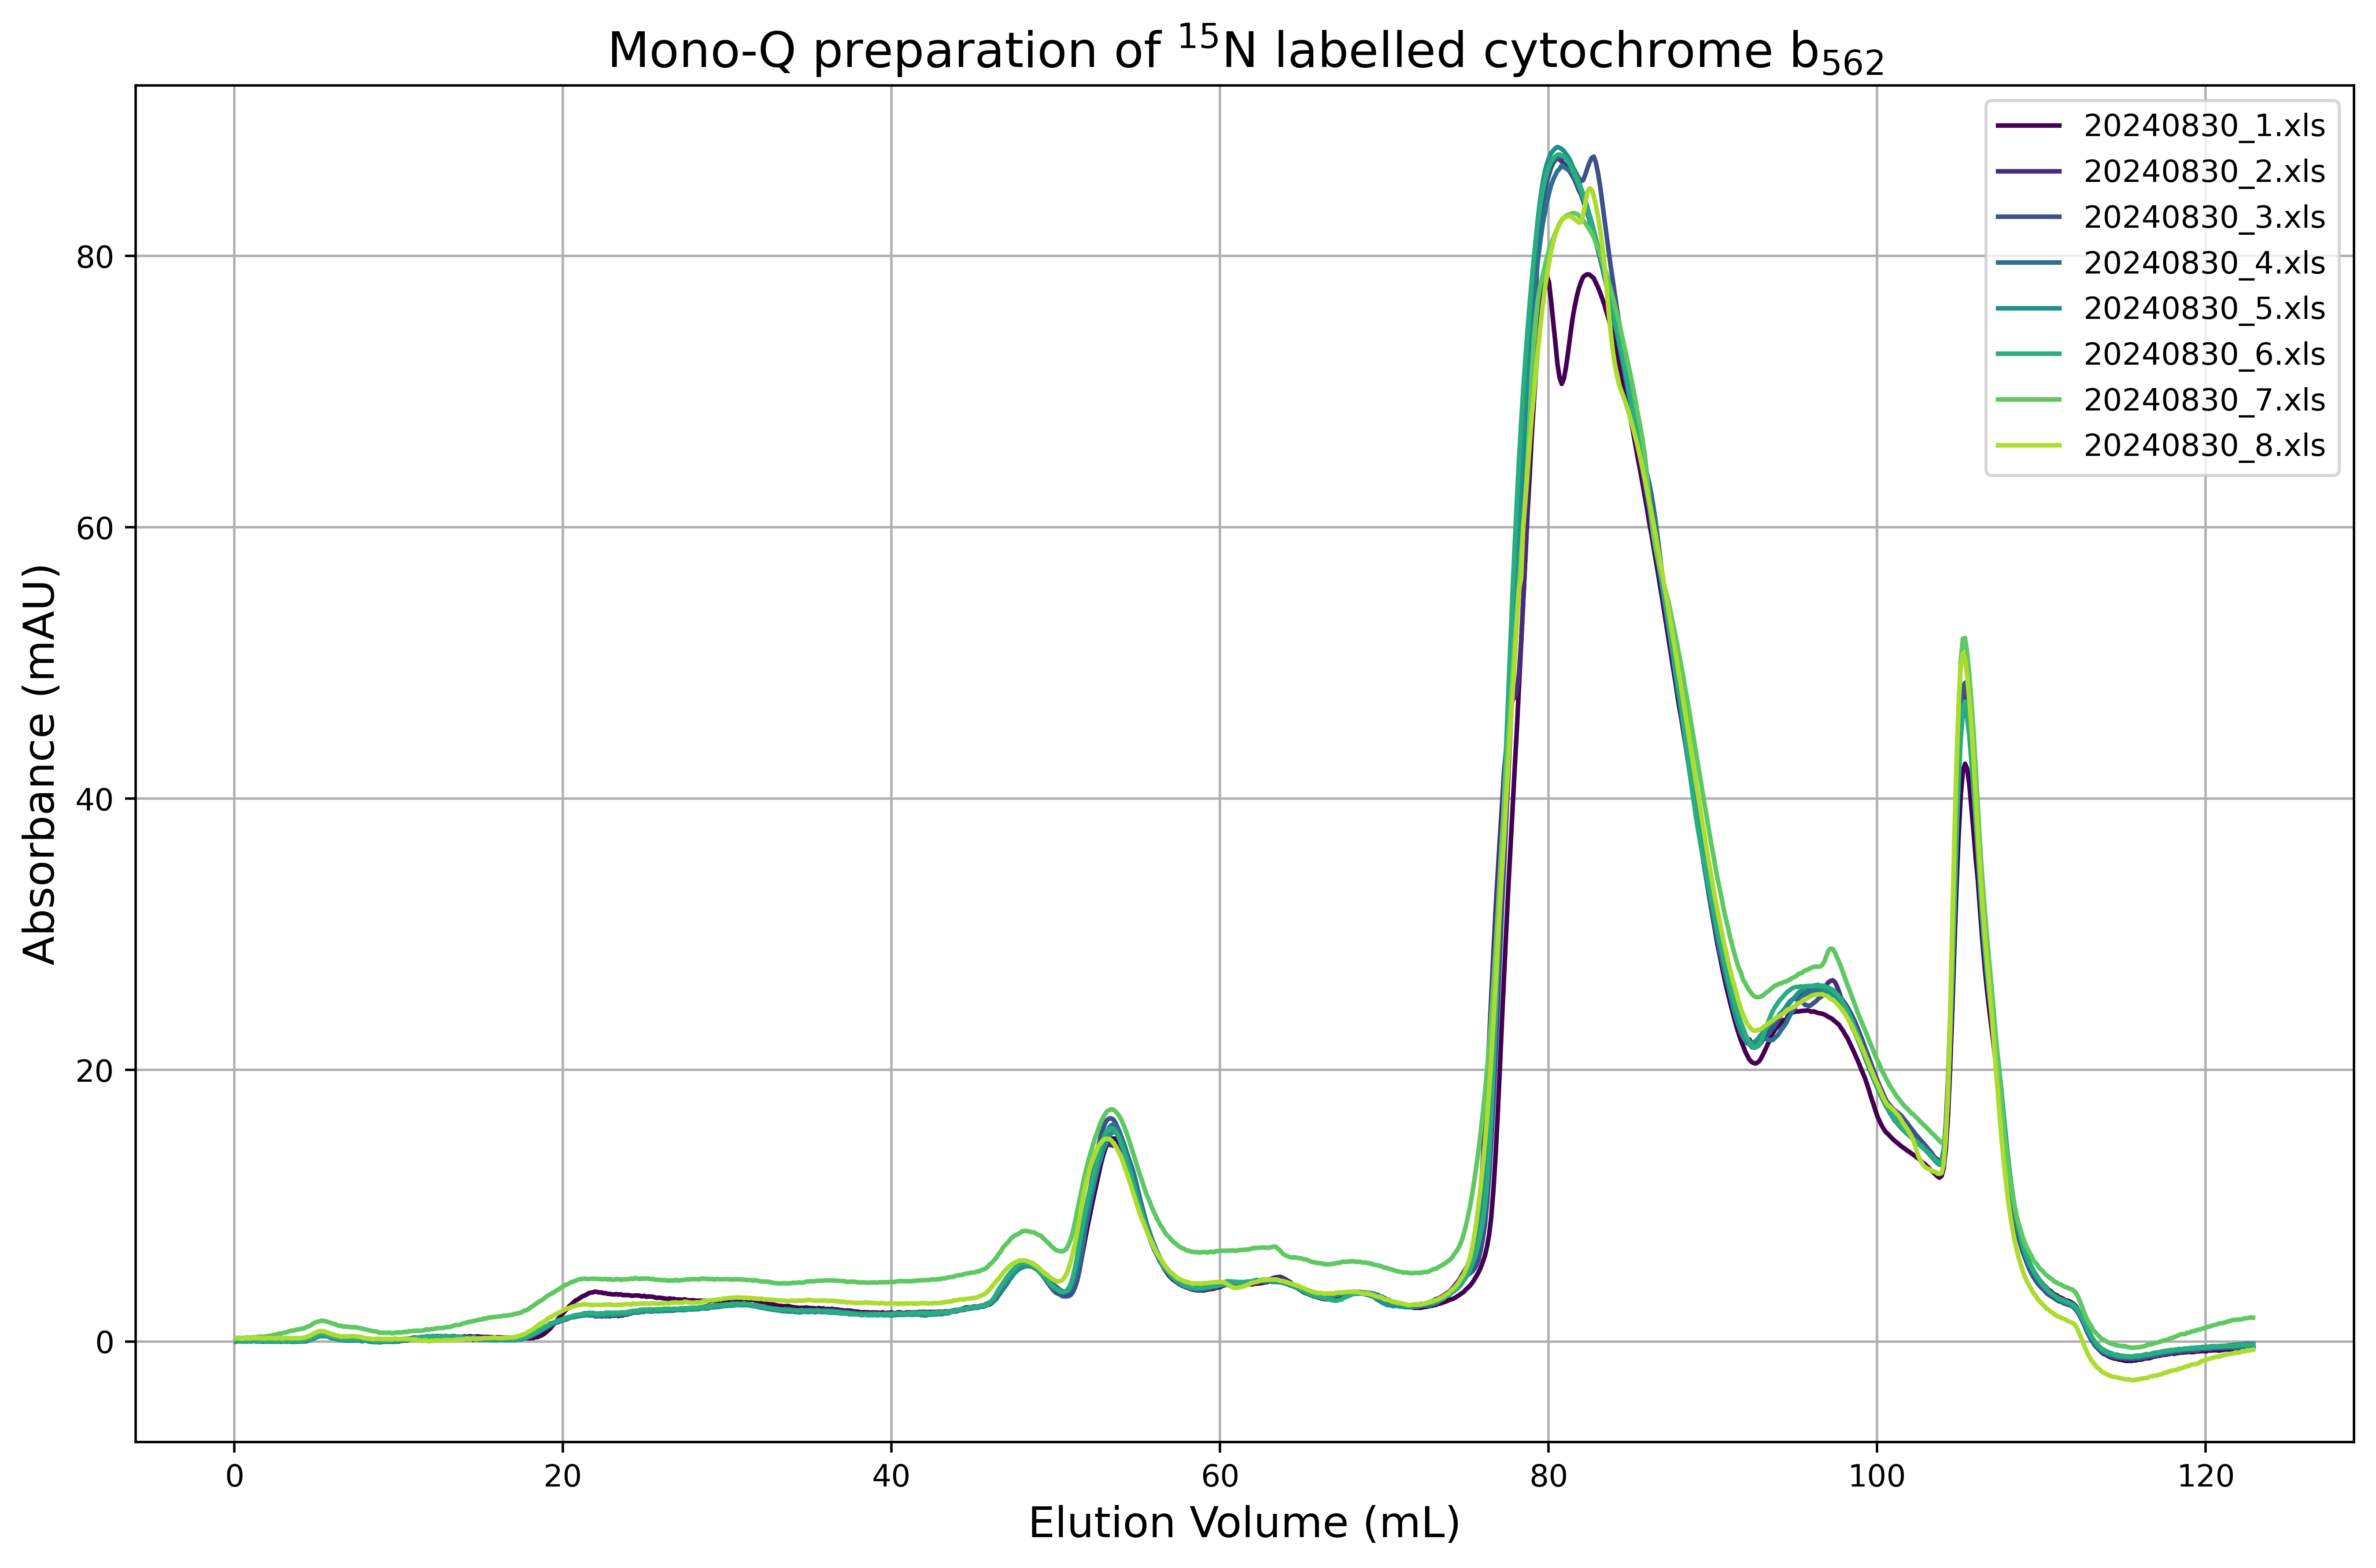

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(13, 8), dpi=500)

# Iterate over the DataFrames and plot, use enumerate to get both index and df
for i, df in enumerate(ordered_result_dfs[0:8]):
    ax.plot(df['vol'], df['A280'], label=new_order[i], color=cmap(i))


    # Set labels and title
ax.set_xlabel("Elution Volume (mL)", fontsize=14, fontname='DejaVu Sans')
ax.set_ylabel("Absorbance (mAU)", color="black", fontsize=14, fontname='DejaVu Sans')
ax.set_title("Mono-Q preparation of $^{15}$N labelled cytochrome b$_{562}$", fontsize=16)

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()